# CMSE 802 Pre-class assignment: Python functions and Navier-Stokes equation 
## Date: 09/20/2018
## Due: 09/24/2018, 10:30 PM
### The goal of this assignment is to learn how to make our own Python functions and obtain some backgrounds of the Navier-Stokes equation.

---
### Your name: Boyao Zhu
---

### Part 1: Python functions
**Watch the youtube video in the cell below. It demonstrates how to make a Python function on Jupyter notebook.  **

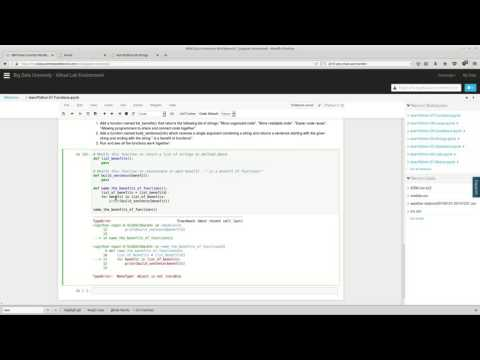

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Pc2TTKVxt1o',width=720,height=540)
## This video provides a tutorial for making functions in Python.

### Now, let's write a Python function for solving the Laplace equation using piont-wise relaxation method (e.g., Task 3, In-class assignment 2D FDM and PDE 20180918).

### Problem set up.

<img src="LapDm-1.png" alt = "drawing" width=400 />

The 2D domain spans from x = 0 to 1, and from y = 0 to 1, as shown in the figure above.  We want to solve

$$\nabla^2 \phi = 0~~~~\text{for}~~~~ \phi~~~~\text{in the 2D domain}.$$

The boundary conditions are 

$$\phi = 10 y~~~~\text{at}~~~~x=0$$ 

$$\phi = -10x +10~~~~\text{at}~~~~y=1,$$

and no-flux boundary conditions for the remaining two sides. The domain is discretized into 81$\times$81 grid points.


In [1]:
# load libraries
import numpy as np
import time as tm

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

**Write your Python function in the cell below for solving the 2D Laplace equation below.**

The inputs (arguements) are 
(1) $\phi$: the initial guess;
(2) nx and Lx: the number of grids and domain size in the x direction; 
(3) ny and Ly: the number of grids and domain size in the y direction;
(4) norm_target: the criterion to terminate the iterations.

The outputs (returns) are 
(1) $\phi$: the solved field;
(2) xmsh and ymsh: the mesh grids for plotting;
(3) cnt: number of iterations.

In [5]:
# #######################################
# function 1 for solving Laplace equation
# #######################################    
    
def laplace_2D_pw(phi,nx,Lx,ny,Ly,norm_target):

    # spatial discretization
    Xg = np.linspace(0, Lx, nx)
    Yg = np.linspace(0, Ly, ny)
    
    dx = Xg[2] - Xg[1]
    dy = Yg[2] - Yg[1]

    # meshgrid generate the x and y coordinates of the 2D grid system
    xmsh, ymsh = np.meshgrid(Yg, Xg)

    # iteration using while loop
    cnt = 0
    nrm = 1.0
    resd = np.zeros((nx,ny))
    while nrm > norm_target:

        # iterative solver using vectorized calculation
        phi[1:nx-1,1:ny-1] = (dy**2*(phi[0:nx-2,1:ny-1] + phi[2:nx,1:ny-1]) + \
                              dx**2*(phi[1:nx-1,0:ny-2] + phi[1:nx-1,2:ny]))/(2*(dx**2+dy**2))                  # <== fill the blank

        # boundary conditions
        phi[0,0:ny-1] = 10*Yg[0:ny-1]      # at x = 0     # <== fill the blank
        phi[nx-1,0:ny-1] = phi[nx-2,0:ny-1]                 # at x = 1     # <== fill the blank

        phi[0:nx-1,0] = phi[0:nx-1,1]                  # at y = 0     # <== fill the blank
        phi[0:nx-1,ny-1] = -10*Xg[0:nx-1]+10 # at y = 1     # <== fill the blank


        # calculating residual for the Laplace equation, using vectorized calculation
        resd[1:nx-1,1:ny-1] = (phi[0:nx-2,1:ny-1]-2*phi[1:nx-1,1:ny-1]+phi[2:nx,1:ny-1])/dx**2+ \
                              (phi[1:nx-1,0:ny-2]-2*phi[1:nx-1,1:ny-1]+phi[1:nx-1,2:ny])/dy**2                # <== fill the blank
        
        cnt = cnt + 1

        # calculate Forbenius norm of the residual
        nrm = np.linalg.norm(resd[1:nx-1,1:ny-1])

    #print(cnt,nrm,norm_target)
    
    return phi, xmsh, ymsh, cnt

**Use your Python functin in the code below. Let's use 1.0e-3 for norm_target. In the code below, you will test two functions. First, you will use laplace_2D_pw. After you finish testing Function 1, you will need to complete Function 2, laplace_2D_pw_numba (in the cell below Code 1), come back to run Function 2 in Code 1, and compare the speed between the two functions. **

In [ ]:
# #######################################
# Code 1 
# #######################################

# spatial discretization
nx = 81    # number of grids in the x direction
Lx = 1.0    # dimension in the x direction

ny = 81
Ly = 1.0


# field
phi = np.zeros((nx,ny))


# walltime before iterative matrix solving
WT_bgn = tm.time()


norm_target = 1.0e-3
# call your function of solving the Lapalce equation.
# Case 1
phi, xmsh, ymsh, cnt = laplace_2D_pw(phi,nx,Lx,ny,Ly,norm_target)    # <== fill the blank


# Case 2    
#phi, xmsh, ymsh, cnt = laplace_2D_pw_numba(phi,nx,Lx,ny,Ly,norm_target)    # <== fill the blank
print (cnt)


# walltime after iterative matrix solving        
WT_end = tm.time() 

print(WT_end - WT_bgn)

# visualization
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
ax.plot_surface(xmsh[1:nx-1,1:ny-1],ymsh[1:nx-1,1:ny-1], phi[1:nx-1,1:ny-1], cmap=cm.jet)
ax.plot_surface(xmsh, ymsh, phi, cmap=cm.jet)
ax.view_init(20, -40)
#ax.set_zlim3d(0,1)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()


**How many iterations (occuring within function 1) does you code take to solve the Laplace equation?**

**Your answer:** 71634

---
### Part 2. Optimizing Loops with Numba

In this pre-class assignment, we are going to learn Numba, which will make your code faster. Let's load the numba library and use autojit in the function.

In [43]:
# load numba library
from numba import autojit

In [44]:
# #######################################
# function 2 for solving Laplace equation
# #######################################

@autojit
def laplace_2D_pw_numba(phi,nx,Lx,ny,Ly,norm_target):
    
    # Copy your function 1 to here

    # spatial discretization
    Xg = np.linspace(0, Lx, nx)
    Yg = np.linspace(0, Ly, ny)
    
    dx = Xg[2] - Xg[1]
    dy = Yg[2] - Yg[1]

    # meshgrid generate the x and y coordinates of the 2D grid system
    xmsh, ymsh = np.meshgrid(Yg, Xg)

    # iteration using while loop
    cnt = 0
    nrm = 1.0
    resd = np.zeros((nx,ny))
    while nrm > norm_target:

        # iterative solver using vectorized calculation
        phi[1:nx-1,1:ny-1] = (dy**2*(phi[0:nx-2,1:ny-1] + phi[2:nx,1:ny-1]) + \
                              dx**2*(phi[1:nx-1,0:ny-2] + phi[1:nx-1,2:ny]))/(2*(dx**2+dy**2))                  # <== fill the blank

        # boundary conditions
        phi[0,0:ny-1] = 10*Yg[0:ny-1]      # at x = 0     # <== fill the blank
        phi[nx-1,0:ny-1] = phi[nx-2,0:ny-1]                 # at x = 1     # <== fill the blank

        phi[0:nx-1,0] = phi[0:nx-1,1]                  # at y = 0     # <== fill the blank
        phi[0:nx-1,ny-1] = -10*Xg[0:nx-1]+10 # at y = 1     # <== fill the blank


        # calculating residual for the Laplace equation, using vectorized calculation
        resd[1:nx-1,1:ny-1] = (phi[0:nx-2,1:ny-1]-2*phi[1:nx-1,1:ny-1]+phi[2:nx,1:ny-1])/dx**2+ \
                              (phi[1:nx-1,0:ny-2]-2*phi[1:nx-1,1:ny-1]+phi[1:nx-1,2:ny])/dy**2                # <== fill the blank
        
        cnt = cnt + 1

        # calculate Forbenius norm of the residual
        nrm = np.linalg.norm(resd[1:nx-1,1:ny-1])


    #print(cnt,nrm,norm_target)
    
    return phi, xmsh, ymsh, cnt

**Now you have Function 2, named laplace_2D_pw_numba. Go back to Code 1 and change it to use this new function. Check whether your code runs faster. What are the computer times for the two cases (Functions 1 and 2)?** 

**Your answer:** Functions 1: 12.361363172531128
                 Functions 2: 8.380482912063599

**Another command "timeit" can be used to check the computer time per loop. Try the command given in the cell below.**

In [47]:
%%timeit
laplace_2D_pw(phi,nx,Lx,ny,Ly,norm_target)

269 µs ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [48]:
%%timeit
laplace_2D_pw_numba(phi,nx,Lx,ny,Ly,norm_target)

168 µs ± 3.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


---
### Part 3: Introduction to the Navier-Stokes equation

### Let's watch two videos to learn some basic ideas of the Navier-Stokes equation. If you are interested in knowing more about the Navier-Stokes equation, go to wikipedia for further reading.

https://en.wikipedia.org/wiki/Navier–Stokes_equations

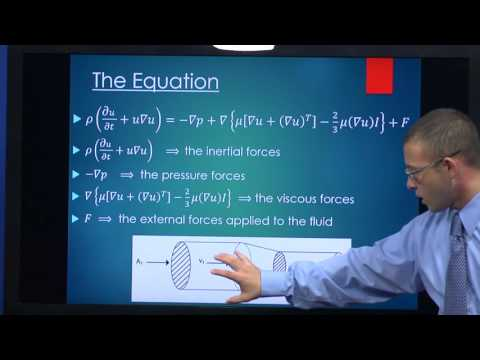

In [49]:
from IPython.display import YouTubeVideo
YouTubeVideo('EsWvCBqx1Xc',width=720,height=540)

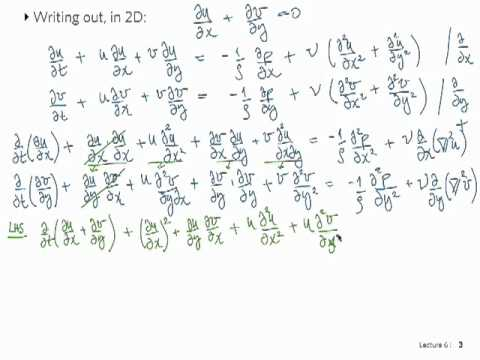

In [50]:
## The following video will explain how to discretize the Navier-Stokes equations. 
## You can skip go over it fast.
YouTubeVideo('ZjfxA3qq2Lg',width=720,height=540)

### Assignment wrap-up

**What questions do you have, if any, about any of the topics discussed in this assignment.**

**Put your answer here!**

**Do you have any further questions or comments about this material?**

**Put your answer here!**

### Congratulations, you're done with your first pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course Desire2Learn web page.  Go to Assessments > Assignments, find the link for Pre-class assignment 20180925, and upload it there.

**Please keep a copy the code. We will reuse the code in the class.**

See you in class!